In [445]:
# import necessary packages
import pandas as pd
import numpy as np
import scipy as sp
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm
from sklearn.decomposition import PCA

from scipy.spatial import distance
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs

%matplotlib  inline
pal = sns.set_palette(sns.color_palette("OrRd_r", 6))

In [446]:
# read in all three csv files
df_full = pd.read_csv('Recipes_Full.csv', index_col = 'Unnamed: 0')
df_cats = pd.read_csv('Recipes_Categories.csv', index_col = 'Unnamed: 0')
df_ingr = pd.read_csv('Recipes_Ingredients.csv', index_col = 'Unnamed: 0')

In [447]:
df_cats.head()

,Title,Rating,Rating Group,Date Time,Calories,Protein,Fat,Sodium,22-Minute Meals,3-Ingredient Recipes,...,Vegan,Vegetarian,Vermont,Virginia,Washington,"Washington, D.C.",Weelicious,Wheat/Gluten-Free,Winter,Wisconsin
0,"Lentil, Apple, and Turkey Wrap",2.500,2-3,2006-09-01 04:00:00.000,426.0,30.0,7.0,559.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,4-5,2004-08-20 04:00:00.000,403.0,18.0,23.0,1439.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,Potato and Fennel Soup Hodge,3.750,3-4,2004-08-20 04:00:00.000,165.0,6.0,7.0,165.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,4-5,2009-03-27 04:00:00.000,NaN,NaN,NaN,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,3-4,2004-08-20 04:00:00.000,547.0,20.0,32.0,452.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [448]:
df_cats.shape

(20052, 256)

In [449]:
clusters_allrecipes_df = pd.DataFrame(df_cats['Title'])
clusters_meals_df = pd.DataFrame()

# K-Means Clustering

In [450]:
# transform binary category columns into a matrix
categories_matrix = np.matrix(df_cats.as_matrix())[:,8:]
categories_matrix.shape

(20052, 248)

## Clustering by all Categories

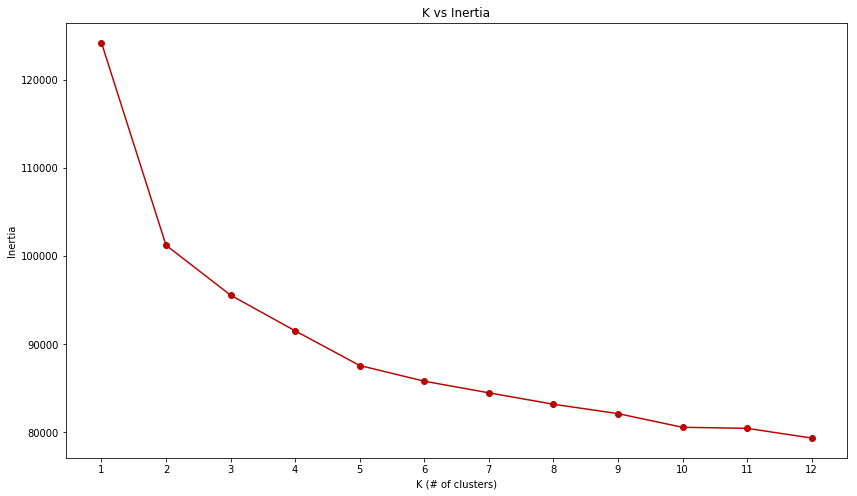

In [451]:
# iterate through Ks from 1 to 12 and append results to list
results = []
ks = range(1, 13)
for k in ks:
    # Create a KMeans instance with k clusters
    kmeans = KMeans(n_clusters=k, random_state=10)    
    # Fit model to the matrix
    kmeans.fit(categories_matrix)   
    # Append the inertia to the list of results
    results.append(kmeans.inertia_)
    
# Plot ks vs inertias
plt.figure(figsize=(14,8))
plt.plot(ks, results, '-o')
plt.title('K vs Inertia')
plt.xlabel('K (# of clusters)')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.show()

I would say that the elbow is either at k=5 or k=10. Let's see how many recipes fall into each cluster when k=5 and k=10.

   cluster5
0      3093
1      6456
2      2778
3      2630
4      5095


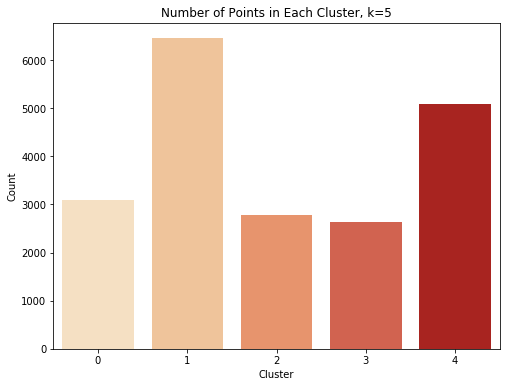

In [452]:
# computer kmeans where k=5
k_5 = 5
kmeans_5 = KMeans(n_clusters=k_5, random_state=10)
clusters_allrecipes_df['cluster5'] = kmeans_5.fit_predict(categories_matrix)
cluster_count_5 = pd.DataFrame(clusters_allrecipes_df['cluster5'].value_counts().sort_index())
print(cluster_count_5)

# plot bar graph of clusters and number of data points in each cluster
plt.figure(figsize=(8,6))
sns.barplot(x=cluster_count_5.index, y=cluster_count_5.cluster5, palette = 'OrRd')
plt.xticks(cluster_count_5.index)
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Number of Points in Each Cluster, k=5')
plt.show()

   cluster10
0       1412
1       4871
2       1483
3       2231
4       2462
5       1679
6       1542
7        801
8       1715
9       1856


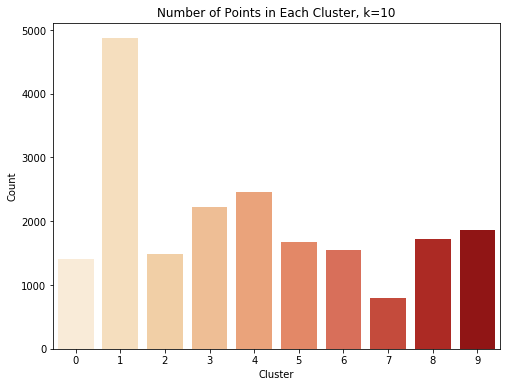

In [453]:
# computer kmeans where k=5
k_10 = 10
kmeans_10 = KMeans(n_clusters=k_10, random_state=10)
clusters_allrecipes_df['cluster10'] = kmeans_10.fit_predict(categories_matrix)
cluster_count_10 = pd.DataFrame(clusters_allrecipes_df['cluster10'].value_counts().sort_index())
print(cluster_count_10)

# plot bar graph of clusters and number of data points in each cluster
plt.figure(figsize=(8,6))
sns.barplot(x=cluster_count_10.index, y=cluster_count_10.cluster10, palette = 'OrRd')
plt.xticks(cluster_count_10.index)
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Number of Points in Each Cluster, k=10')
plt.show()

I think that k=5 is more reasonable, but do we really want to limit how many customer segments we will have? We have a lot of categories, so it might be better to have 10 clusters. Let's check the silhouette scores for the various sizes of k.

In [454]:
# compute silhouette score for k=5
silhouette_avg_5 = silhouette_score(categories_matrix, clusters_allrecipes_df['cluster5'])

In [455]:
# compute silhouette score for k=10
silhouette_avg_10 = silhouette_score(categories_matrix, clusters_allrecipes_df['cluster10'])

In [456]:
print('Silhouette scores:')
print('k=5:', round(silhouette_avg_5,4))
print('k=10:', round(silhouette_avg_10,4))

Silhouette scores:
k=5: 0.0902
k=10: 0.0797


k=5 provides us with the higher silhouette score, but neither score is very high. Let's see if we can reduce our data set to only include rows where the recipe is at least categorized as a meal. This will help us remove recipes for ingredients, such as chicken stock or salsa.

## Clustering by Categories where Recipe is Identified as a Meal

In [457]:
# create list of meal categories
meals = ['Breakfast', 'Lunch', 'Brunch', 'Dinner', 'Appetizer', 'Dessert']

# new column to identify if a recipe is for a meal category
df_cats['Meal Sum'] = df_cats['Breakfast'] + df_cats['Lunch'] + df_cats[
                        'Brunch'] + df_cats['Dinner'] + df_cats['Appetizer'] + df_cats['Dessert']

# remove recipe row if it's not a meal
df_cats_meals = df_cats.loc[df_cats['Meal Sum'] > 0].loc[:, :'Wisconsin']
df_cats_meals.shape

(8763, 256)

In [458]:
df_cats_meals.columns

Index(['Title', 'Rating', 'Rating Group', 'Date Time', 'Calories', 'Protein',
       'Fat', 'Sodium', '22-Minute Meals', '3-Ingredient Recipes',
       ...
       'Vegan', 'Vegetarian', 'Vermont', 'Virginia', 'Washington',
       'Washington, D.C.', 'Weelicious', 'Wheat/Gluten-Free', 'Winter',
       'Wisconsin'],
      dtype='object', length=256)

In [459]:
# let's also remove columns if there are no rows that have that category
df_cats_meals.drop([col for col, val in df_cats_meals.sum().iteritems() if val == 0], axis=1, inplace=True)
df_cats_meals.shape

(8763, 248)

In [460]:
clusters_meals_df = df_cats_meals[['Title','Breakfast', 'Lunch', 'Brunch', 'Dinner', 'Appetizer', 'Dessert']]

We've reduced our data set down to only 8,763 rows. Let's rerun the K-Means algorithm to see what results we get.

In [461]:
# transform binary category columns into a matrix
categories_matrix_meals = np.matrix(df_cats_meals.as_matrix())[:,8:]
categories_matrix_meals.shape

(8763, 240)

In [462]:
categories_matrix_meals

matrix([[0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, ..., 1.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
        ...,
        [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, ..., 1.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0]], dtype=object)

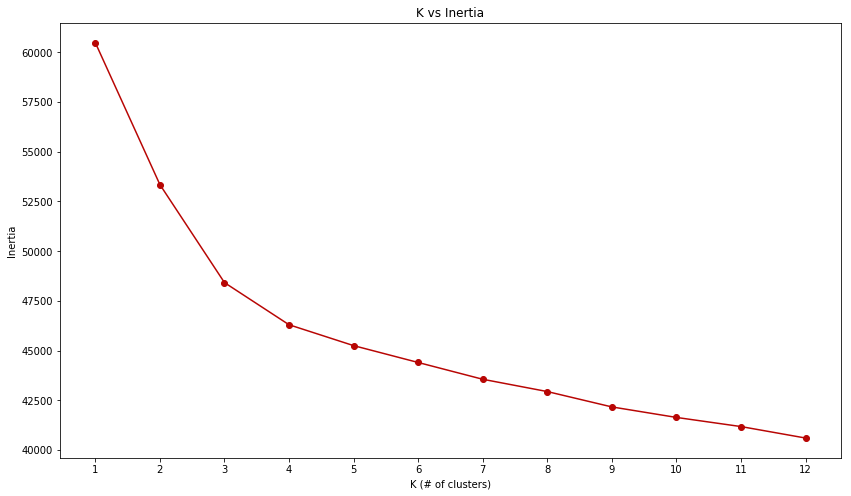

In [463]:
# iterate through Ks from 1 to 12 and append results to list
results_meals = []
for k in ks:
    # Create a KMeans instance with k clusters
    kmeans = KMeans(n_clusters=k, random_state=10)    
    # Fit model to the matrix
    kmeans.fit(categories_matrix_meals)   
    # Append the inertia to the list of results
    results_meals.append(kmeans.inertia_)
    
# Plot ks vs inertias
plt.figure(figsize=(14,8))
plt.plot(ks, results_meals, '-o')
plt.title('K vs Inertia')
plt.xlabel('K (# of clusters)')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.show()

It looks like the elbow in the graph is around k=3. Let's compute the silhouette scores to see if we're getting better results with this extract of data.

In [464]:
# initiate dictionary and range for for loop
avg_s_scores_meals = {}
range_n_clusters = range(2,13)

# test various sizes of k and save corresponding silhouette score
for k in range_n_clusters:

    # Initialize the clusterer with k value and a random generator
    clusterer = KMeans(n_clusters=k, random_state=10)    
    cluster_labels = clusterer.fit_predict(categories_matrix_meals)   
    
    # compute silhouette score
    silhouette_avg = silhouette_score(categories_matrix_meals, cluster_labels)
    avg_s_scores_meals[k] = silhouette_avg

In [465]:
# print all scores from dictionary
for key, value in avg_s_scores_meals.items():
    print('k =', key, ':', round(value,4))

k = 2 : 0.119
k = 3 : 0.1272
k = 4 : 0.1215
k = 5 : 0.1022
k = 6 : 0.113
k = 7 : 0.0789
k = 8 : 0.0632
k = 9 : 0.0636
k = 10 : 0.0628
k = 11 : 0.0574
k = 12 : 0.0684


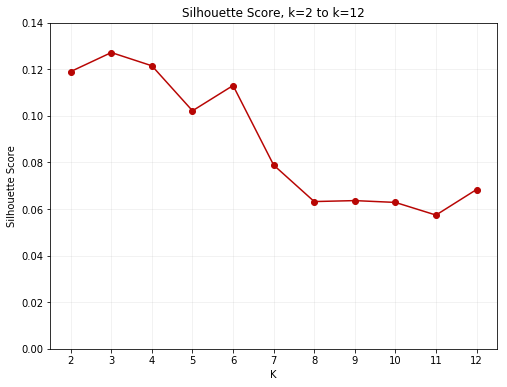

In [466]:
# plot silhouette score for each k
x, y = zip(*sorted(avg_s_scores_meals.items()))
plt.figure(figsize=(8,6))
plt.plot(x, y, '-o')
plt.xticks(range_n_clusters)
plt.yticks([0, .02, .04, .06, .08, .10, .12, .14])
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score, k=2 to k=12')
plt.grid(True, alpha=.2)
plt.show()

We've ended up with higher silhouette scores than before! And k=3 for our meal dataset results in the maximum silhouette score. But is this too few clusters for the segmentation? I think that k=6 is a more appropriate number of clusters. Let's check to see how the clusters are distributed for k=3 and k=6.

/Users/isabelvanzijl/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


   cluster3
0      3538
1      2209
2      3016


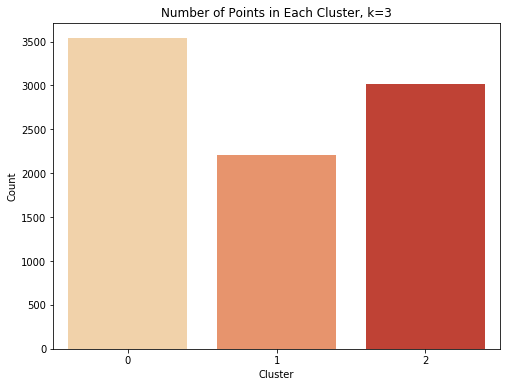

In [467]:
# computer kmeans where k=3
k_3 = 3
kmeans_3 = KMeans(n_clusters=k_3, random_state=10)
clusters_meals_df['cluster3'] = kmeans_3.fit_predict(categories_matrix_meals)
cluster_count_3 = pd.DataFrame(clusters_meals_df['cluster3'].value_counts().sort_index())
print(cluster_count_3)

# plot bar graph of clusters and number of data points in each cluster
plt.figure(figsize=(8,6))
sns.barplot(x=cluster_count_3.index, y=cluster_count_3.cluster3, palette = 'OrRd')
plt.xticks(cluster_count_3.index)
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Number of Points in Each Cluster, k=3')
plt.show()

/Users/isabelvanzijl/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


   cluster6
0      1142
1      1344
2      1299
3      2149
4      2096
5       733


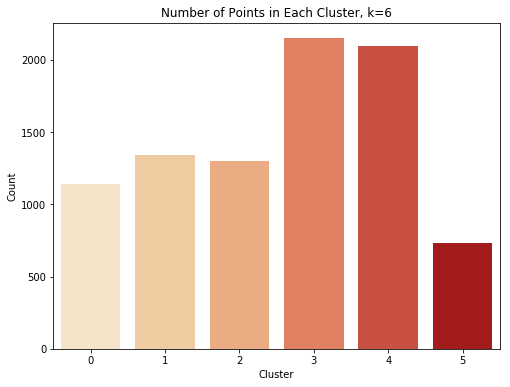

In [468]:
# computer kmeans where k=6
k_6 = 6
kmeans_6 = KMeans(n_clusters=k_6, random_state=10)
clusters_meals_df['cluster6'] = kmeans_6.fit_predict(categories_matrix_meals)
cluster_count_6 = pd.DataFrame(clusters_meals_df['cluster6'].value_counts().sort_index())
print(cluster_count_6)

# plot bar graph of clusters and number of data points in each cluster
plt.figure(figsize=(8,6))
sns.barplot(x=cluster_count_6.index, y=cluster_count_6.cluster6, palette = 'OrRd')
plt.xticks(cluster_count_6.index)
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Number of Points in Each Cluster, k=6')
plt.show()

My biggest concern for k=6 is that each cluster just contains one of our meal types (e.g. Breakfast or Dinner). If this ends up being the case, we may have to try reducing our data set to just be one type of meal.

In [469]:
# k=6, cluster=0
clusters_meals_df.loc[clusters_meals_df['cluster6'] == 0].head(20)[[
    'Title','Breakfast', 'Lunch', 'Brunch', 'Dinner', 'Appetizer', 'Dessert', 'cluster6']]

,Title,Breakfast,Lunch,Brunch,Dinner,Appetizer,Dessert,cluster6
34,Fontina Mac with Squash and Sage,0.0,1.0,0.0,1.0,0.0,0.0,0
47,Herbed Goat Cheese Spread with Mint,0.0,0.0,0.0,1.0,1.0,0.0,0
61,"Romaine, Grilled Avocado, and Smoky Corn Salad...",0.0,1.0,0.0,0.0,0.0,0.0,0
66,Scarborough Fair Tofu Burger,0.0,1.0,0.0,1.0,0.0,0.0,0
70,"Roasted Butternut Squash, Rosemary, and Garlic...",0.0,0.0,0.0,1.0,0.0,0.0,0
89,Ricotta Omelets,1.0,0.0,1.0,0.0,0.0,0.0,0
128,Spicy Sesame Noodles with Chopped Peanuts and ...,0.0,0.0,0.0,1.0,0.0,0.0,0
133,Radishes with Burrata,0.0,1.0,0.0,0.0,0.0,0.0,0
150,Jalapeño-Cheddar Frittata,0.0,0.0,1.0,0.0,1.0,0.0,0
151,Roasted Beets and Citrus with Feta,0.0,0.0,0.0,1.0,1.0,0.0,0


In [470]:
# k=6, cluster=1
clusters_meals_df.loc[clusters_meals_df['cluster6'] == 1].head(20)[[
    'Title','Breakfast', 'Lunch', 'Brunch', 'Dinner', 'Appetizer', 'Dessert', 'cluster6']]

,Title,Breakfast,Lunch,Brunch,Dinner,Appetizer,Dessert,cluster6
35,Aztec Chicken,0.0,0.0,0.0,1.0,0.0,0.0,1
43,Purple-Potato and Crab Gratin,0.0,1.0,0.0,0.0,0.0,0.0,1
53,Pancetta Roast Chicken with Walnut Stuffing,0.0,0.0,0.0,1.0,0.0,0.0,1
102,Parsnip and Apple Soup,0.0,0.0,0.0,0.0,1.0,0.0,1
103,Short Rib Pot Pie,0.0,0.0,0.0,1.0,0.0,0.0,1
146,Sage-Roasted Turkey with Caramelized Onions an...,0.0,0.0,0.0,1.0,0.0,0.0,1
147,Shrimp Cakes with Andouille Sausage,0.0,1.0,0.0,0.0,1.0,0.0,1
155,"Sauteed Veal with Shrimp, Mushroom, and Brandy...",0.0,0.0,0.0,1.0,0.0,0.0,1
170,Red Wine Brasato with Glazed Root Vegetables,0.0,0.0,0.0,1.0,0.0,0.0,1
178,Baked Beans with Slab Bacon and Breadcrumbs,0.0,0.0,0.0,1.0,0.0,0.0,1


In [471]:
# k=6, cluster=2
clusters_meals_df.loc[clusters_meals_df['cluster6'] == 2].head(20)[[
    'Title','Breakfast', 'Lunch', 'Brunch', 'Dinner', 'Appetizer', 'Dessert', 'cluster6']]

,Title,Breakfast,Lunch,Brunch,Dinner,Appetizer,Dessert,cluster6
3,Mahi-Mahi in Tomato Olive Sauce,0.0,0.0,0.0,1.0,0.0,0.0,2
9,Ham Persillade with Mustard Potato Salad and M...,0.0,1.0,0.0,0.0,0.0,0.0,2
19,"Tuna, Asparagus, and New Potato Salad with Chi...",0.0,1.0,0.0,0.0,0.0,0.0,2
30,Asian Steak Topped with Bell Pepper Stir-Fry,0.0,0.0,0.0,1.0,0.0,0.0,2
36,Pastry Twists with Spiced Sugar-Honey Glaze,0.0,0.0,0.0,0.0,0.0,1.0,2
44,"Grilled Beef, Jícama, and Apple Salad",0.0,0.0,0.0,1.0,0.0,0.0,2
50,Mexican Chile and Mushroom Soup,0.0,1.0,0.0,0.0,0.0,0.0,2
52,Braised Chicken With Artichokes and Olives,0.0,0.0,0.0,1.0,0.0,0.0,2
55,Collard-and-Prosciutto Chicken Roulades Over W...,0.0,0.0,0.0,1.0,0.0,0.0,2
80,"Braised Chicken and Rice with Orange, Saffron,...",0.0,0.0,0.0,1.0,0.0,0.0,2


In [472]:
# k=6, cluster=3
clusters_meals_df.loc[clusters_meals_df['cluster6'] == 3].head(20)[[
    'Title','Breakfast', 'Lunch', 'Brunch', 'Dinner', 'Appetizer', 'Dessert', 'cluster6']]

,Title,Breakfast,Lunch,Brunch,Dinner,Appetizer,Dessert,cluster6
11,Spicy Noodle Soup,1.0,0.0,0.0,0.0,0.0,0.0,3
22,Fish Fillets in Parchment with Asparagus and O...,0.0,0.0,0.0,1.0,0.0,0.0,3
23,Pancetta and Taleggio Lasagna with Treviso,0.0,0.0,0.0,1.0,0.0,0.0,3
51,Peanut Butter-Banana Muffins,1.0,0.0,1.0,0.0,0.0,0.0,3
54,1977 Coconut Angel Food Cake,0.0,0.0,0.0,0.0,0.0,1.0,3
76,South American-Style Jícama and Orange Salad,0.0,0.0,0.0,0.0,1.0,0.0,3
78,Maple Pumpkin Pots de Crème,0.0,0.0,0.0,0.0,0.0,1.0,3
86,Bacon Crackers,0.0,0.0,0.0,0.0,1.0,0.0,3
87,Roast Chicken With Sorghum and Squash,0.0,0.0,0.0,1.0,0.0,0.0,3
97,Roast Beef Salad with Cabbage and Horseradish,0.0,1.0,0.0,0.0,0.0,0.0,3


In [473]:
# k=6, cluster=4
clusters_meals_df.loc[clusters_meals_df['cluster6'] == 4].head(20)[[
    'Title','Breakfast', 'Lunch', 'Brunch', 'Dinner', 'Appetizer', 'Dessert', 'cluster6']]

,Title,Breakfast,Lunch,Brunch,Dinner,Appetizer,Dessert,cluster6
12,Banana-Chocolate Chip Cake With Peanut Butter ...,0.0,0.0,0.0,0.0,0.0,1.0,4
16,Sweet Buttermilk Spoon Breads,1.0,0.0,1.0,0.0,0.0,1.0,4
29,Apricot-Cherry Shortcakes,0.0,0.0,0.0,0.0,0.0,1.0,4
40,Coconut-Key Lime Sheet Cake,0.0,0.0,0.0,0.0,0.0,1.0,4
57,Pumpkin Muffins,1.0,0.0,1.0,0.0,0.0,0.0,4
64,Mixed Berry Pavlovas,0.0,0.0,0.0,0.0,0.0,1.0,4
65,Orange-Almond Cake with Chocolate Icing,0.0,0.0,0.0,0.0,0.0,1.0,4
68,White Chocolate Tartlets with Strawberries and...,0.0,0.0,0.0,0.0,0.0,1.0,4
72,Pear-Hazelnut Cheesecakes with Pear-Raspberry ...,0.0,0.0,0.0,0.0,0.0,1.0,4
75,Banana Layer Cake with Cream Cheese Frosting,0.0,0.0,0.0,0.0,0.0,1.0,4


In [474]:
# k=6, cluster=5
clusters_meals_df.loc[clusters_meals_df['cluster6'] == 5].head(20)[[
    'Title','Breakfast', 'Lunch', 'Brunch', 'Dinner', 'Appetizer', 'Dessert', 'cluster6']]

,Title,Breakfast,Lunch,Brunch,Dinner,Appetizer,Dessert,cluster6
26,Cucumber-Basil Egg Salad,0.0,1.0,0.0,1.0,0.0,0.0,5
49,Citrus Salad with Mint Sugar,1.0,0.0,1.0,0.0,0.0,0.0,5
114,"Cranberry, Quince, and Pearl Onion Compote",1.0,0.0,0.0,0.0,0.0,0.0,5
148,Creamy Tofu Salad,0.0,1.0,0.0,0.0,0.0,0.0,5
172,Egg Salad with Lemon and Fennel,0.0,0.0,0.0,1.0,0.0,0.0,5
196,Lemon-Parsley Linguine,0.0,0.0,0.0,1.0,0.0,0.0,5
229,Blackberry-Raspberry Sauce,0.0,0.0,0.0,0.0,0.0,1.0,5
242,"Frisée, Radicchio, and Asian Pear Salad with H...",0.0,1.0,0.0,0.0,0.0,0.0,5
271,Breakfast Bowl With Quinoa and Berries,1.0,0.0,0.0,0.0,0.0,0.0,5
295,Florida Ambrosia Salad,0.0,0.0,0.0,0.0,0.0,1.0,5


Let's try to visualize the six clusters.

In [475]:
# initiate PCA
pca = PCA(n_components = 2)

# build dataframe
pca_df = pd.DataFrame(np.matrix(pca.fit_transform(categories_matrix_meals)), columns=['x','y'])
clusters_meals_df['x6'], clusters_meals_df['y6'] = pca_df.loc[:,'x'], pca_df.loc[:,'y']

# initiate dictionary of cluster centers
cluster_centers_6 = kmeans_6.cluster_centers_

clusters_meals_df.head()

/Users/isabelvanzijl/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Title,Breakfast,Lunch,Brunch,Dinner,Appetizer,Dessert,cluster3,cluster6,x6,y6
3,Mahi-Mahi in Tomato Olive Sauce,0.0,0.0,0.0,1.0,0.0,0.0,0,2,-0.454989,-1.117747
9,Ham Persillade with Mustard Potato Salad and M...,0.0,1.0,0.0,0.0,0.0,0.0,0,2,-0.815101,-0.942818
11,Spicy Noodle Soup,1.0,0.0,0.0,0.0,0.0,0.0,1,3,-0.730748,0.690415
12,Banana-Chocolate Chip Cake With Peanut Butter ...,0.0,0.0,0.0,0.0,0.0,1.0,2,4,0.394607,0.927469
16,Sweet Buttermilk Spoon Breads,1.0,0.0,1.0,0.0,0.0,1.0,2,4,0.156614,1.006022


In [476]:
cluster_centers_6

array([[-3.46944695e-18,  1.75131349e-03,  1.31348511e-02, ...,
         4.21190893e-01,  1.15586690e-01,  1.68051337e-18],
       [ 3.72023810e-03,  7.44047619e-04,  8.92857143e-03, ...,
         4.74702381e-01,  1.97916667e-01,  7.44047619e-04],
       [ 4.61893764e-03,  4.72712147e-17,  1.92455735e-02, ...,
         5.74287914e-01,  1.50885296e-01,  3.30681663e-18],
       [ 1.39599814e-03,  7.91065612e-03,  3.25732899e-03, ...,
         3.35039553e-02,  1.58213122e-01,  4.65332713e-04],
       [-3.46944695e-18,  9.54198473e-04,  7.15648855e-03, ...,
         3.05820611e-01,  1.67461832e-01,  4.77099237e-04],
       [-3.46944695e-18,  1.36425648e-03,  1.36425648e-02, ...,
         8.69031378e-01,  1.17326057e-01, -5.74627151e-18]])

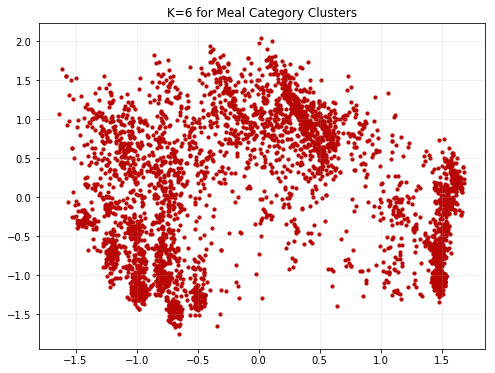

In [477]:
# plot clusters without cluster colors
fig = plt.figure(figsize = (8,6))
plt.scatter(x = clusters_meals_df['x6'], y = clusters_meals_df['y6'], s = 10)
plt.title('K=6 for Meal Category Clusters')
plt.grid(True, alpha=.2)

In [478]:
# assign colors for clusters
color_map_6 = {0 : '#9b59b6',
               1 : '#3498db',
               2 : '#95a5a6',
               3 : '#e74c3c',
               4 : '#34495e',
               5 : '#2ecc71',
               }

label_color = [color_map_6[l] for l in clusters_meals_df['cluster6']]

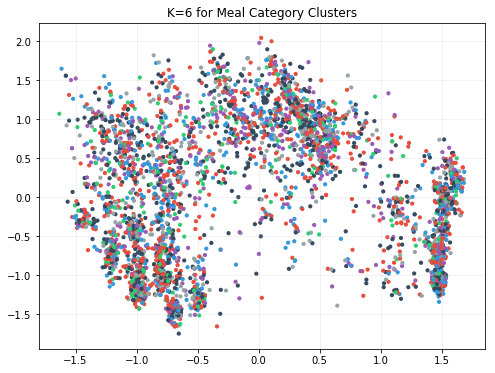

In [479]:
# plot clusters with cluster colors
fig = plt.figure(figsize = (8,6))
plt.scatter(x = clusters_meals_df['x6'], y = clusters_meals_df['y6'], s = 10, 
            c = label_color)
plt.title('K=6 for Meal Category Clusters')
plt.grid(True, alpha=.2)

We are definitely not getting any clear clusters. Ignoring the colors in the above plot, it would seem that there would be some relateively clear clusters. I could definitely see how k=3 would have provided us with the best silhouette score. But once we color code each point by cluster, it is utter chaos. There are no clearly colored clusters and all the colored points are scattered everywhere.

We will have to try reducing some fields to see if we get better results. But first, since k=3 provided us with the highest silhouette score, let's see if it can provide us with a clear visualization of recipe clusters.

In [480]:
# build dataframe
pca_df3 = pd.DataFrame(np.matrix(pca.fit_transform(categories_matrix_meals)), columns=['x','y'])
clusters_meals_df['x3'], clusters_meals_df['y3'] = pca_df3.loc[:,'x'], pca_df.loc[:,'y']

# initiate dictionary of cluster centers
cluster_centers_3 = kmeans_3.cluster_centers_

clusters_meals_df.head()

/Users/isabelvanzijl/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Title,Breakfast,Lunch,Brunch,Dinner,Appetizer,Dessert,cluster3,cluster6,x6,y6,x3,y3
3,Mahi-Mahi in Tomato Olive Sauce,0.0,0.0,0.0,1.0,0.0,0.0,0,2,-0.454989,-1.117747,-0.454989,-1.117747
9,Ham Persillade with Mustard Potato Salad and M...,0.0,1.0,0.0,0.0,0.0,0.0,0,2,-0.815101,-0.942818,-0.815101,-0.942818
11,Spicy Noodle Soup,1.0,0.0,0.0,0.0,0.0,0.0,1,3,-0.730748,0.690415,-0.730748,0.690415
12,Banana-Chocolate Chip Cake With Peanut Butter ...,0.0,0.0,0.0,0.0,0.0,1.0,2,4,0.394607,0.927469,0.394608,0.927469
16,Sweet Buttermilk Spoon Breads,1.0,0.0,1.0,0.0,0.0,1.0,2,4,0.156614,1.006022,0.156615,1.006022


In [481]:
# assign colors for clusters
color_map_3 = {0 : '#3498db',
               1 : '#95a5a6',
               2 : '#e74c3c'
               }

label_color3 = [color_map_3[l] for l in clusters_meals_df['cluster3']]

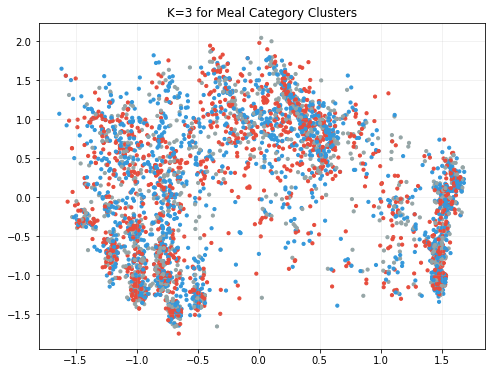

In [482]:
# plot clusters with cluster colors
fig = plt.figure(figsize = (8,6))
plt.scatter(x = clusters_meals_df['x3'], y = clusters_meals_df['y3'], s = 10, 
            c = label_color3)
plt.title('K=3 for Meal Category Clusters')
plt.grid(True, alpha=.2)

We're still not getting any clusters that stand out. It's possible that our data is too highly dimensional.

## Clustering by Categories where Recipe is Identified as a Meal and Rating is = 5

We clearly need to have a better defined data set since there are no clear clusters above. Let's try clustering recipes that have been identified as a type of meal and have a rating of 5. We will want to use our most highly rated recipes anyway, so eliminating lower rated recipes now will hopefully just help our clustering algorithm.

In [483]:
# remove rows with rating of 4 or lower
df_cats_meals_rating = df_cats_meals.loc[df_cats_meals['Rating'] == 5].loc[:, :'Wisconsin']
df_cats_meals_rating.shape

(1352, 248)

In [484]:
# remove columns if there are no rows that have that category
df_cats_meals_rating.drop([col for col, val in df_cats_meals_rating.sum().iteritems() if 
                           val == 0], axis=1, inplace=True)
df_cats_meals_rating.shape

(1352, 198)

In [485]:
clusters_meals_rating_df = df_cats_meals[['Title','Breakfast', 'Lunch', 'Brunch', 
                                          'Dinner', 'Appetizer', 'Dessert']]

In [486]:
# transform binary category columns into a matrix
categories_matrix_meals_rating = np.matrix(df_cats_meals_rating.as_matrix())[:,8:]
categories_matrix_meals_rating.shape

(1352, 190)

In [487]:
categories_matrix_meals_rating

matrix([[0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, ..., 0.0, 1.0, 0.0],
        [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
        ...,
        [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, ..., 0.0, 1.0, 0.0],
        [0.0, 1.0, 0.0, ..., 0.0, 0.0, 0.0]], dtype=object)

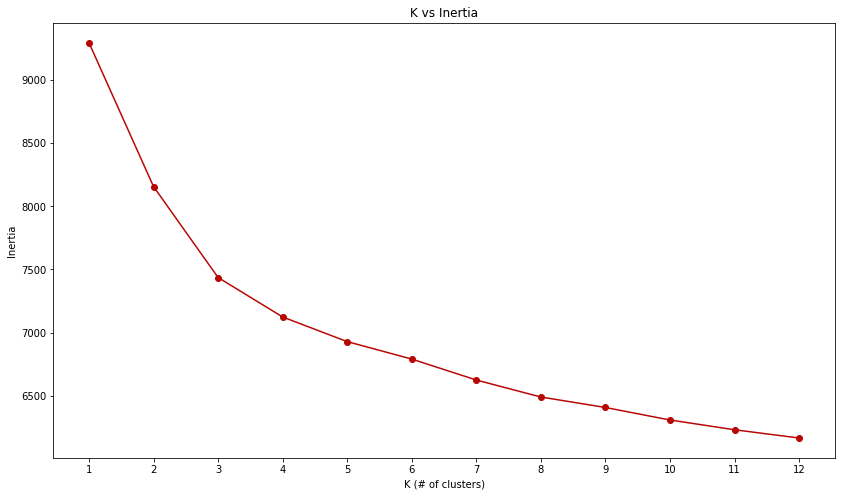

In [488]:
# iterate through Ks from 1 to 12 and append results to list
results_meals_rating = []
for k in ks:
    # Create a KMeans instance with k clusters
    kmeans = KMeans(n_clusters=k, random_state=10)    
    # Fit model to the matrix
    kmeans.fit(categories_matrix_meals_rating)   
    # Append the inertia to the list of results
    results_meals_rating.append(kmeans.inertia_)
    
# Plot ks vs inertias
plt.figure(figsize=(14,8))
plt.plot(ks, results_meals_rating, '-o')
plt.title('K vs Inertia')
plt.xlabel('K (# of clusters)')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.show()

The elbow here seems to appear around k=4

In [489]:
# initiate dictionary and range for for loop
avg_s_scores_meals_rating = {}
range_n_clusters = range(2,13)

# test various sizes of k and save corresponding silhouette score
for k in range_n_clusters:

    # Initialize the clusterer with k value and a random generator
    clusterer = KMeans(n_clusters=k, random_state=10)    
    cluster_labels = clusterer.fit_predict(categories_matrix_meals_rating)   
    
    # compute silhouette score
    silhouette_avg = silhouette_score(categories_matrix_meals_rating, cluster_labels)
    avg_s_scores_meals_rating[k] = silhouette_avg

In [490]:
# print all scores from dictionary
for key, value in avg_s_scores_meals_rating.items():
    print('k =', key, ':', round(value,4))

k = 2 : 0.1225
k = 3 : 0.1287
k = 4 : 0.1207
k = 5 : 0.0997
k = 6 : 0.0771
k = 7 : 0.0898
k = 8 : 0.0728
k = 9 : 0.0752
k = 10 : 0.0711
k = 11 : 0.0746
k = 12 : 0.0715


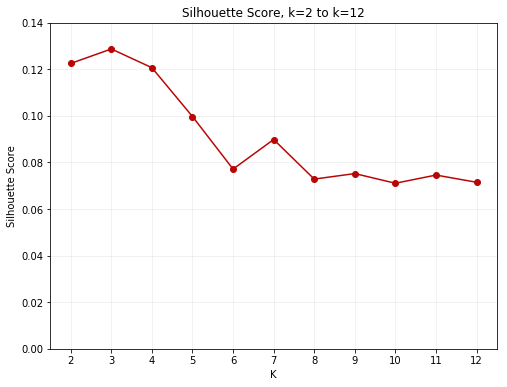

In [491]:
# plot silhouette score for each k
x, y = zip(*sorted(avg_s_scores_meals_rating.items()))
plt.figure(figsize=(8,6))
plt.plot(x, y, '-o')
plt.xticks(range_n_clusters)
plt.yticks([0, .02, .04, .06, .08, .10, .12, .14])
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score, k=2 to k=12')
plt.grid(True, alpha=.2)
plt.show()

In our other silhouette score plot, we saw a spike at k=6. Here we see a spike at k=7 but the silhouette score is still lower that what we originally had.

Let's compare the silhouette scores from before:

In [492]:
# print all score differences from dictionaries
for key, value1 in avg_s_scores_meals.items():
    value2 = avg_s_scores_meals_rating[key]
    print('k =', key, ': [Meals] - [Meals and Rating of 5]: ', round(value1,4), 
          '-', round(value2,4),'=', round(value1-value2,4))
    
max1key = 0
max1value = 0
max2key = 0
max2value = 0

for key, value in avg_s_scores_meals.items():
    if value > max1value:
        max1key = key
        max1value = value
    
for key, value in avg_s_scores_meals_rating.items():
    if value > max2value:
        max2key = key
        max2value = value

print()
print('Meal categories: highest k = %s with silhouette score of %.4f' % (max1key, max1value))
print('Meal categories with a rating of 5: highest k = %s with silhouette score of %.4f' % (max2key, max2value))

k = 2 : [Meals] - [Meals and Rating of 5]:  0.119 - 0.1225 = -0.0035
k = 3 : [Meals] - [Meals and Rating of 5]:  0.1272 - 0.1287 = -0.0015
k = 4 : [Meals] - [Meals and Rating of 5]:  0.1215 - 0.1207 = 0.0008
k = 5 : [Meals] - [Meals and Rating of 5]:  0.1022 - 0.0997 = 0.0025
k = 6 : [Meals] - [Meals and Rating of 5]:  0.113 - 0.0771 = 0.0359
k = 7 : [Meals] - [Meals and Rating of 5]:  0.0789 - 0.0898 = -0.011
k = 8 : [Meals] - [Meals and Rating of 5]:  0.0632 - 0.0728 = -0.0096
k = 9 : [Meals] - [Meals and Rating of 5]:  0.0636 - 0.0752 = -0.0116
k = 10 : [Meals] - [Meals and Rating of 5]:  0.0628 - 0.0711 = -0.0082
k = 11 : [Meals] - [Meals and Rating of 5]:  0.0574 - 0.0746 = -0.0172
k = 12 : [Meals] - [Meals and Rating of 5]:  0.0684 - 0.0715 = -0.0031

Meal categories: highest k = 3 with silhouette score of 0.1272
Meal categories with a rating of 5: highest k = 3 with silhouette score of 0.1287


For the max k of 3, the meal categories with ratings higher than 4 results in a slightly higher silhouette score. But for k=6, our previous result without limiting recipes by rating gave us a higher silhouette score. Limiting our dataset to only recipes with a user rating of 5 has overall not improved our results, so we will stick with the original meal matrix.

## Clustering by Categories AND Ingredients where Recipe is Identified as a Meal

Considering the above result, I think that these clusters could be a little more clear cut. Let's see what happens when we specify meal categories on the dataframe that contains both categories and ingredients.

In [495]:
df_full['Meal Sum'] = df_full['Breakfast'] + df_full['Lunch'] + df_full[
                        'Brunch'] + df_full['Dinner'] + df_full['Appetizer'] + df_full['Dessert']

df_full_meals = df_full.loc[df_full['Meal Sum'] > 0].loc[:, '22-Minute Meals':'Zucchini']

# our Fat and Sodium columns are getting pulled in incorrectly
# we have enough categories, so simply remove them
df_full_meals.drop('Fat.1', axis=1, inplace=True)
df_full_meals.drop('Sodium.1', axis=1, inplace=True)

df_full_meals.shape

(8763, 587)

In [496]:
# let's also remove columns if there are no rows that have that category/ingredient
df_full_meals.drop([col for col, val in df_full_meals.sum().iteritems() if val == 0], axis=1, inplace=True)
df_full_meals.shape

(8763, 576)

In [497]:
# transform binary category columns into a matrix
full_matrix_meals = np.matrix(df_full_meals.as_matrix())[:,8:]
full_matrix_meals.shape

(8763, 568)

In [498]:
full_matrix_meals

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [502]:
# check to make sure all binary variables
for i, row in df_full_meals.iterrows():
    for j in row.index:
        if row[j] > 1:
            print(i, j, row[j])

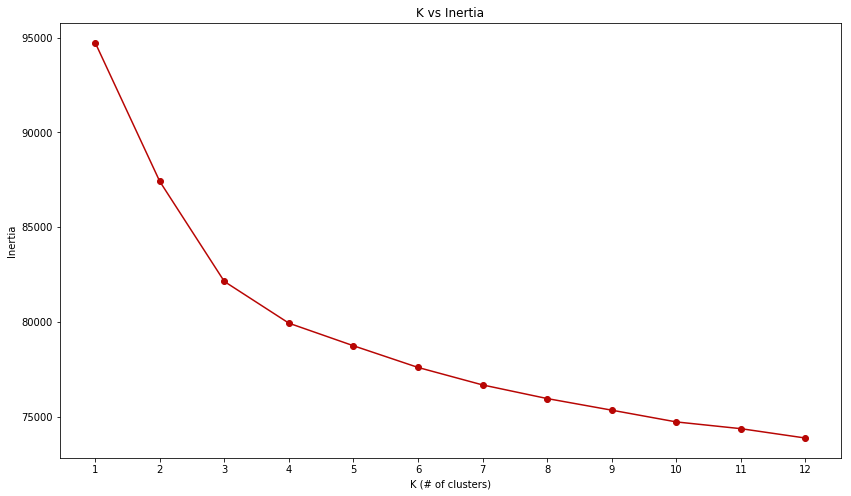

In [503]:
# iterate through Ks from 1 to 12 and append results to list
results_full_meals = []
for k in ks:
    # Create a KMeans instance with k clusters
    kmeans = KMeans(n_clusters=k, random_state=10)    
    # Fit model to the matrix
    kmeans.fit(full_matrix_meals)   
    # Append the inertia to the list of results
    results_full_meals.append(kmeans.inertia_)
    
# Plot ks vs inertias
plt.figure(figsize=(14,8))
plt.plot(ks, results_full_meals, '-o')
plt.title('K vs Inertia')
plt.xlabel('K (# of clusters)')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.show()

The elbow again seems to be at k=4, and no other number of clusters stands out to me.

In [504]:
# initiate dictionary and range for for loop
avg_s_scores_full_meals = {}

# test various sizes of k and save corresponding silhouette score
for k in range_n_clusters:

    # Initialize the clusterer with k value and a random generator
    clusterer = KMeans(n_clusters=k, random_state=10)    
    cluster_labels = clusterer.fit_predict(full_matrix_meals)   
    
    # compute silhouette score
    silhouette_avg = silhouette_score(full_matrix_meals, cluster_labels)
    avg_s_scores_full_meals[k] = silhouette_avg

In [505]:
# print all scores from dictionary
for key, value in avg_s_scores_full_meals.items():
    print('k =', key, ':', round(value,4))

k = 2 : 0.0776
k = 3 : 0.0799
k = 4 : 0.0772
k = 5 : 0.0594
k = 6 : 0.0446
k = 7 : 0.0438
k = 8 : 0.0382
k = 9 : 0.0383
k = 10 : 0.0394
k = 11 : 0.0285
k = 12 : 0.0343


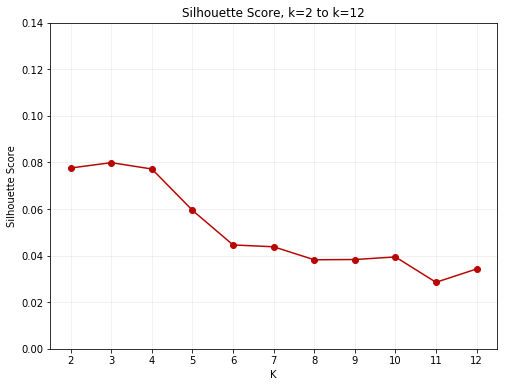

In [506]:
# plot silhouette score for each k
x, y = zip(*sorted(avg_s_scores_full_meals.items()))
plt.figure(figsize=(8,6))
plt.plot(x, y, '-o')
plt.xticks(range_n_clusters)
plt.yticks([0, .02, .04, .06, .08, .10, .12, .14])
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score, k=2 to k=12')
plt.grid(True, alpha=.2)
plt.show()

Adding the ingredient columns to our dataset worsened our results. So far k=3 for our meal specified categories givees us the highest silhouette score. But perhaps we can get better results from a different algorithm. K-means is meant to provide us with a low number of clusters usually, so maybe we'll get better results from an algorithm that's meant to provide us with more clusters. Considering that we have so much data, I think that this could work out well. I also think that we should keep only including rows that have at least one meal tag, since it has so far provided us with the best results in the K-Means algorithm.

# NLP on Recipe Titles - Word2Vec

We haven't been able to successfully identify clusters from category or ingredient tags, so let's see if studying the similarities between reicpe titles yields any results.

In [838]:
import re
import nltk.data
nltk.download('punkt')
tokenizer = nltk.data.load('nltk:tokenizers/punkt/english.pickle')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/isabelvanzijl/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [839]:
# fxn to convert meals df to list of words
def sentence_to_wordlist(recipe, remove_stopwords=False):
    
    # remove non-letters
    recipe_text = re.sub(r'[^\w\s]','', recipe)
    recipe_text = re.sub(r'-',' ', recipe)
    
    # convert words to lower case and split them
    words = recipe_text.lower().split()
    
    # return a list of words
    return(words)

In [840]:
# fxn to split text into parsed sentences
def rec_to_sentence(recipe, tokenizer, remove_stopwords=False ):
    try:
        # use the NLTK tokenizer to split the text into sentences
        raw_sentences = tokenizer.tokenize(recipe.strip())
        
        # 2loop over each sentence
        sentences = []
        for raw_sentence in raw_sentences:
            # If a sentence is empty, skip it
            if len(raw_sentence) > 0:
                # call sentence_to_wordlist to get a list of words
                sentences.append(sentence_to_wordlist(raw_sentence))
        # return the list of sentences (each sentence is a list of words, so this returns a list of lists)
        len(sentences)
        return sentences
    except:
        print('nope')

In [841]:
# apply fxns to recipe names
recipes = clusters_meals_df['Title'].tolist()
titles = []

for i in range(0,len(recipes)):
    try:
        # apply fxn
        titles += rec_to_sentence(recipes[i], tokenizer)
    except:
        print('no!')

In [842]:
# remove basic words
for i in titles:
    for j in i:
        if j in ('in','with','and', 'of'):
            i.remove(j)

In [843]:
print("There are " + str(len(titles)) + " recipes that we are studying")

There are 8766 recipes that we are studying


In [844]:
# check one of the sentences
titles[200]

['bittersweet', 'chocolate', 'citrus', 'tart', 'jasmine', 'whipped', 'cream']

In [845]:
import gensim
from gensim.models import Word2Vec
from gensim.models import word2vec
from gensim.models import Phrases
from gensim.models.keyedvectors import BaseKeyedVectors
import logging

In [846]:
# initialize the model
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s',\
    level=logging.INFO)

num_features = 500    # Word vector dimensionality                      
min_word_count = 5   # Minimum word count                        
num_workers = 4       # Number of threads to run in parallel
context = 6           # Context window size                                                                                    
downsampling = 1e-3   # Downsample setting for frequent words

model = word2vec.Word2Vec(titles, workers=num_workers, \
            size=num_features, min_count = min_word_count, \
            window = context, sample = downsampling)

2018-02-23 17:25:25,032 : INFO : collecting all words and their counts
2018-02-23 17:25:25,038 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-02-23 17:25:25,066 : INFO : collected 3658 word types from a corpus of 40018 raw words and 8766 sentences
2018-02-23 17:25:25,069 : INFO : Loading a fresh vocabulary
2018-02-23 17:25:25,080 : INFO : min_count=5 retains 1085 unique words (29% of original 3658, drops 2573)
2018-02-23 17:25:25,087 : INFO : min_count=5 leaves 35865 word corpus (89% of original 40018, drops 4153)
2018-02-23 17:25:25,120 : INFO : deleting the raw counts dictionary of 3658 items
2018-02-23 17:25:25,122 : INFO : sample=0.001 downsamples 82 most-common words
2018-02-23 17:25:25,126 : INFO : downsampling leaves estimated 29950 word corpus (83.5% of prior 35865)
2018-02-23 17:25:25,137 : INFO : estimated required memory for 1085 words and 500 dimensions: 4882500 bytes
2018-02-23 17:25:25,141 : INFO : resetting layer weights
2018-02-23 17:25:

In [847]:
model.init_sims(replace=True)

2018-02-23 17:25:25,939 : INFO : precomputing L2-norms of word weight vectors


In [848]:
words = list(model.wv.vocab.keys())

# look at top 25 words
words[:25]

['mahi',
 'tomato',
 'olive',
 'sauce',
 'ham',
 'mustard',
 'potato',
 'salad',
 'mashed',
 'peas',
 'spicy',
 'noodle',
 'soup',
 'banana',
 'chocolate',
 'chip',
 'cake',
 'peanut',
 'butter',
 'frosting',
 'sweet',
 'buttermilk',
 'tuna,',
 'asparagus,',
 'new']

In [849]:
# let's see what the semantic vector for 'salad' looks like
model['salad']

/Users/isabelvanzijl/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


array([-2.55956966e-02,  1.13115022e-02, -3.43326181e-02,  1.41556328e-02,
        1.97606608e-02, -2.38330700e-02, -5.37764058e-02,  6.91712052e-02,
        8.34341049e-02,  3.29160541e-02,  1.07209887e-02, -4.40019257e-02,
       -6.94004372e-02, -1.13444133e-02,  3.39342430e-02, -8.15153718e-02,
       -1.42880797e-03,  1.00680247e-01, -2.71834042e-02,  1.16172833e-02,
        5.28204404e-02, -8.85307230e-03,  5.76173700e-02, -6.99263215e-02,
       -4.25486639e-03, -7.20768347e-02, -4.88388352e-02,  5.67835979e-02,
        3.93464267e-02,  2.69323178e-02, -3.21517661e-02,  4.24024202e-02,
       -8.78513604e-02,  4.08979803e-02,  3.14865191e-03, -2.39273943e-02,
       -4.53251600e-03, -2.00144779e-02,  2.95756403e-02, -4.19413950e-03,
        3.54570225e-02, -8.74152184e-02,  1.26870340e-02,  1.56943407e-02,
        3.42932940e-02,  4.69680503e-02,  3.27582918e-02,  3.34345326e-02,
        7.69818015e-03, -5.50915860e-02, -8.40758309e-02, -2.90204231e-02,
       -2.53688525e-02, -

In [850]:
# identify common phrases
bigramer = gensim.models.Phrases(titles)

2018-02-23 17:25:26,070 : INFO : collecting all words and their counts
2018-02-23 17:25:26,076 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2018-02-23 17:25:26,245 : INFO : collected 22862 word types from a corpus of 40018 words (unigram + bigrams) and 8766 sentences
2018-02-23 17:25:26,249 : INFO : using 22862 counts as vocab in Phrases<0 vocab, min_count=5, threshold=10.0, max_vocab_size=40000000>


In [851]:
model = Word2Vec(bigramer[sentences], workers=num_workers, \
            size=num_features, min_count = min_word_count, \
            window = context, sample = downsampling)

/Users/isabelvanzijl/anaconda3/lib/python3.6/site-packages/gensim/models/phrases.py:486: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
2018-02-23 17:25:26,276 : INFO : collecting all words and their counts
2018-02-23 17:25:26,280 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-02-23 17:25:26,900 : INFO : collected 3846 word types from a corpus of 43956 raw words and 8766 sentences
2018-02-23 17:25:26,902 : INFO : Loading a fresh vocabulary
2018-02-23 17:25:26,913 : INFO : min_count=5 retains 1214 unique words (31% of original 3846, drops 2632)
2018-02-23 17:25:26,916 : INFO : min_count=5 leaves 39663 word corpus (90% of original 43956, drops 4293)
2018-02-23 17:25:26,928 : INFO : deleting the raw counts dictionary of 3846 items
2018-02-23 17:25:26,930 : INFO : sample=0.001 downsamples 46 most-common words
2018-02-23 17:25:26

In [852]:
# remove basic words    
model.wv.vocab = { k : v for k,v in model.wv.vocab.items() if v not in ('with','and','in', 'of')}

In [864]:
phrases = list(model.wv.vocab.keys())

# look at top 25 phrases
phrases[:25]

['mahi',
 'in',
 'tomato',
 'olive',
 'sauce',
 'ham',
 'with',
 'mustard',
 'potato',
 'salad',
 'and',
 'mashed',
 'peas',
 'spicy',
 'noodle_soup',
 'banana',
 'chocolate_chip',
 'cake',
 'peanut_butter',
 'frosting',
 'sweet',
 'buttermilk',
 'tuna,',
 'asparagus,',
 'new']

In [854]:
# let's look at the vector array for goat cheese
model['goat_cheese']

/Users/isabelvanzijl/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


array([-7.84235745e-05, -8.84485547e-04,  4.74389846e-04, -2.34238731e-04,
        3.10455973e-04,  3.64053063e-04,  2.42473223e-04,  3.39615013e-04,
       -5.35763917e-04, -5.09296195e-04, -9.18547099e-04, -9.58193559e-04,
        8.84151144e-04, -9.65477200e-04, -4.17574425e-04, -3.75000731e-04,
       -8.69113777e-04,  4.41399054e-04,  1.91009967e-04, -9.22668842e-04,
        2.42971091e-05, -5.71062323e-04, -3.40484752e-04, -9.18941398e-04,
       -7.07213650e-04, -7.59128074e-04,  8.46998708e-04,  4.59407136e-04,
        9.99836993e-05,  4.38249059e-04, -6.11322990e-04,  4.87631769e-04,
       -4.53213026e-04, -3.76348617e-04, -2.21996524e-04, -8.82096996e-04,
       -2.94337951e-04, -4.25763224e-04,  9.87228821e-04,  6.74633891e-04,
        1.76188114e-04,  8.57928884e-04, -4.56254027e-04, -1.03999424e-04,
       -6.59956073e-04, -1.81803643e-05, -6.65213796e-04, -9.37475183e-04,
       -4.60041803e-04,  2.08091486e-04,  3.27089474e-05,  2.96274375e-04,
       -3.13005643e-04, -

In [855]:
# let's look at some similarities to goat_cheese, top 15 most similar
model.most_similar('goat_cheese',  topn=15)

/Users/isabelvanzijl/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  
2018-02-23 17:25:27,250 : INFO : precomputing L2-norms of word weight vectors


[('tempura', 0.14515498280525208),
 ('patties', 0.1342310607433319),
 ('upside_down', 0.13097788393497467),
 ('parmesan', 0.13004599511623383),
 ('quince', 0.12556906044483185),
 ('parsley', 0.11591681838035583),
 ('peanuts', 0.11555973440408707),
 ('tortellini', 0.11337701231241226),
 ('of', 0.10875344276428223),
 ('chimichurri', 0.10722700506448746),
 ('kale', 0.10627037286758423),
 ('deep', 0.1036054939031601),
 ('honeydew', 0.10030388832092285),
 ('pots', 0.10028696060180664),
 ('minute', 0.10002878308296204)]

In [856]:
phrases_df = pd.DataFrame()
listoflists = []

# construct dataframe of vectors
for i in phrases:
    vectorlist = np.ndarray.tolist(model[i])
    listoflists.append(vectorlist)
    
phrases_df = pd.DataFrame(listoflists, index=phrases)
phrases_df.drop(['in', 'with', 'and', 'of'], inplace=True)
phrases_df.shape

/Users/isabelvanzijl/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


(1210, 500)

In [857]:
phrases_df['avg'] = phrases_df.sum(axis=1)
phrases_df.head()

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,avg
mahi,-0.000151,0.000826,-0.000175,-0.000560,-0.000790,-0.000329,-0.000200,0.000941,0.000893,0.000425,...,-0.000199,-0.000204,-0.000737,-0.000193,0.000554,0.000560,-0.000801,0.000340,0.000235,0.005210
tomato,-0.000589,0.000190,-0.000546,-0.000074,0.000421,0.000493,-0.000183,0.000560,-0.000324,0.000236,...,-0.000191,-0.000134,0.000108,-0.000226,-0.000284,0.000445,0.000022,0.000316,0.000151,-0.013693
olive,-0.000849,-0.000863,0.000129,-0.000152,0.000832,0.000305,-0.000965,0.000285,0.000611,-0.000435,...,-0.000636,-0.000733,-0.000168,-0.000222,0.000984,-0.000817,-0.000549,-0.000842,-0.000749,-0.004016
sauce,-0.000716,-0.000535,-0.000451,-0.000957,0.000329,0.000504,-0.000608,0.000589,0.000507,-0.000139,...,0.000911,-0.000401,-0.000580,-0.000048,0.000564,0.000296,0.000396,-0.000131,0.000689,-0.011546
ham,0.000259,0.000221,0.000357,0.000321,-0.000794,-0.000823,-0.000773,-0.000927,0.000409,0.000736,...,0.000629,0.000221,0.000344,-0.000119,0.000609,0.000951,-0.000937,0.000267,0.000370,-0.003995


In [858]:
# set averages as own dataframe
phrases_avg_df = pd.DataFrame(phrases_df.loc[:,'avg'])
print(phrases_avg_df.shape)
phrases_avg_df.head()

(1210, 1)


,avg
mahi,0.005210
tomato,-0.013693
olive,-0.004016
sauce,-0.011546
ham,-0.003995


In [859]:
recipe_titles_df = pd.DataFrame(index=recipes, columns=phrases_avg_df.index)
recipe_titles_df.head()

,mahi,tomato,olive,sauce,ham,mustard,potato,salad,mashed,peas,...,fettuccine,lingonberry,rum_raisin,infused,angel,turnip,cured,yum,cheeseburgers,pretzel
Mahi-Mahi in Tomato Olive Sauce,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ham Persillade with Mustard Potato Salad and Mashed Peas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Spicy Noodle Soup,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Banana-Chocolate Chip Cake With Peanut Butter Frosting,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sweet Buttermilk Spoon Breads,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [860]:
rec_dict = dict(zip(recipes, titles))

# fill in dataframe with averaged vector values
for k, l in rec_dict.items():
    for word in l:
        if word not in ('in', 'with', 'and', 'of'):
            if word in phrases:
                wrd_avg = float(phrases_avg_df.loc[word])
                #print(k)
                #print(wrd_avg)
                recipe_titles_df.at[k,word] = wrd_avg          

In [861]:
# replace null values with zeroes
recipe_titles_df = recipe_titles_df.fillna(0)  

In [862]:
recipe_titles_df.tail()

,mahi,tomato,olive,sauce,ham,mustard,potato,salad,mashed,peas,...,fettuccine,lingonberry,rum_raisin,infused,angel,turnip,cured,yum,cheeseburgers,pretzel
Chicken with White Wine and Herbs,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Blueberry Compote,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Chinese Barbecued Spareribs,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Artichoke and Parmesan Risotto,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Turkey Cream Puff Pie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [891]:
# remove rows with rating of 4 or lower
recipe_titles_df = recipe_titles_df.loc[recipe_titles_df['Rating'] == 5].loc[:, :'Wisconsin']
df_cats_meals_rating.shape

print([row.sum() for i, row in recipe_titles_df.iterrows() if row.sum() == 0])

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


## K-Means on Recipe Title Similarities

In [865]:
# transform binary category columns into a matrix
sim_matrix = np.matrix(recipe_titles_df.as_matrix())
sim_matrix.shape

(8763, 1210)

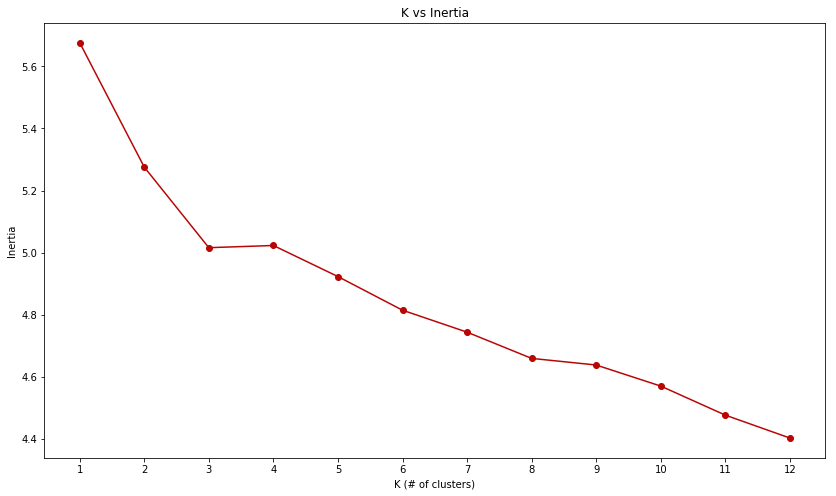

In [866]:
# iterate through Ks from 1 to 12 and append results to list
results = []
ks = range(1, 13)
for k in ks:
    # Create a KMeans instance with k clusters
    kmeans = KMeans(n_clusters=k, random_state=10)    
    # Fit model to the matrix
    kmeans.fit(sim_matrix)   
    # Append the inertia to the list of results
    results.append(kmeans.inertia_)
    
# Plot ks vs inertias
plt.figure(figsize=(14,8))
plt.plot(ks, results, '-o')
plt.title('K vs Inertia')
plt.xlabel('K (# of clusters)')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.show()

Interesting that the inertia increases when moving from k=3 to k=4! Let's look at a few silhouette scores.

In [872]:
# initiate dictionary and range for for loop
avg_s_scores_titles = {}
range_n_clusters = range(2,9)

# test various sizes of k and save corresponding silhouette score
for k in range_n_clusters:

    # Initialize the clusterer with k value and a random generator
    clusterer = KMeans(n_clusters=k, random_state=10)    
    cluster_labels = clusterer.fit_predict(sim_matrix)   
    
    # compute silhouette score
    silhouette_avg = silhouette_score(sim_matrix, cluster_labels)
    avg_s_scores_titles[k] = silhouette_avg

In [873]:
# print all scores from dictionary
for key, value in avg_s_scores_titles.items():
    print('k =', key, ':', round(value,4))

k = 2 : 0.226
k = 3 : 0.2082
k = 4 : 0.0922
k = 5 : 0.1911
k = 6 : 0.1268
k = 7 : 0.0979
k = 8 : 0.1084


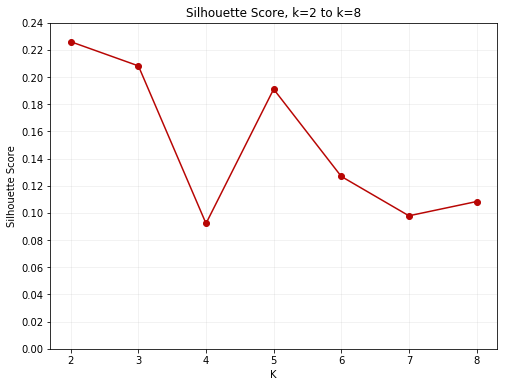

In [876]:
# plot silhouette score for each k
x, y = zip(*sorted(avg_s_scores_titles.items()))
plt.figure(figsize=(8,6))
plt.plot(x, y, '-o')
plt.xticks(range_n_clusters)
plt.yticks([0, .02, .04, .06, .08, .10, .12, .14, .16, .18, .20, .22, .24])
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score, k=2 to k=8')
plt.grid(True, alpha=.2)
plt.show()

I think that going with k=5 gives us the right balance of number of clusters AND relatively high silhouette score.

   cluster5
0      7459
1       636
2       114
3        37
4       517


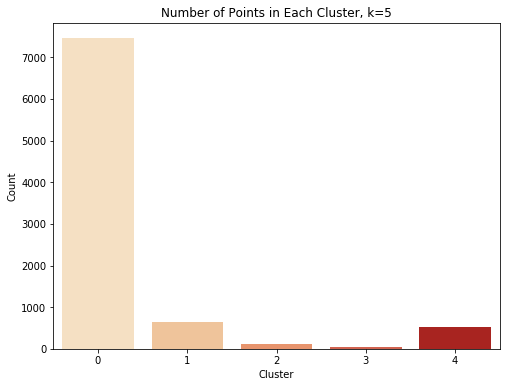

In [886]:
# computer kmeans where k=5
k_5 = 5
kmeans_5 = KMeans(n_clusters=k_5, random_state=10)
recipe_titles_df['cluster5'] = kmeans_5.fit_predict(sim_matrix)
cluster_count_5 = pd.DataFrame(recipe_titles_df['cluster5'].value_counts().sort_index())
print(cluster_count_5)

# plot bar graph of clusters and number of data points in each cluster
plt.figure(figsize=(8,6))
sns.barplot(x=cluster_count_5.index, y=cluster_count_5.cluster5, palette = 'OrRd')
plt.xticks(cluster_count_5.index)
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Number of Points in Each Cluster, k=5')
plt.show()

Let's see which recipes fall in which cluster

In [880]:
# k=5, cluster=0
recipe_titles_df.loc[recipe_titles_df['cluster5'] == 0].head(20)[['cluster5']]

,cluster5
Mahi-Mahi in Tomato Olive Sauce,0
Ham Persillade with Mustard Potato Salad and Mashed Peas,0
Asian Steak Topped with Bell Pepper Stir-Fry,0
Aztec Chicken,0
Pastry Twists with Spiced Sugar-Honey Glaze,0
Purple-Potato and Crab Gratin,0
"Grilled Beef, Jícama, and Apple Salad",0
Mexican Chile and Mushroom Soup,0
Braised Chicken With Artichokes and Olives,0
Pancetta Roast Chicken with Walnut Stuffing,0


In [881]:
# k=5, cluster=1
recipe_titles_df.loc[recipe_titles_df['cluster5'] == 1].head(20)[['cluster5']]

,cluster5
Banana-Chocolate Chip Cake With Peanut Butter Frosting,1
Sweet Buttermilk Spoon Breads,1
Apricot-Cherry Shortcakes,1
Coconut-Key Lime Sheet Cake,1
Pumpkin Muffins,1
Orange-Almond Cake with Chocolate Icing,1
White Chocolate Tartlets with Strawberries and Bananas,1
"Roasted Butternut Squash, Rosemary, and Garlic Lasagne",1
Pear-Hazelnut Cheesecakes with Pear-Raspberry Sauce,1
Banana Layer Cake with Cream Cheese Frosting,1


In [883]:
# k=5, cluster=2
recipe_titles_df.loc[recipe_titles_df['cluster5'] == 2].head(20)[['cluster5']]

,cluster5
Spicy Noodle Soup,2
Fish Fillets in Parchment with Asparagus and Orange,2
Pancetta and Taleggio Lasagna with Treviso,2
Peanut Butter-Banana Muffins,2
1977 Coconut Angel Food Cake,2
South American-Style Jícama and Orange Salad,2
Maple Pumpkin Pots de Crème,2
Bacon Crackers,2
Roast Chicken With Sorghum and Squash,2
Roast Beef Salad with Cabbage and Horseradish,2


In [884]:
# k=5, cluster=3
recipe_titles_df.loc[recipe_titles_df['cluster5'] == 3].head(20)[['cluster5']]

,cluster5
"Tuna, Asparagus, and New Potato Salad with Chive Vinaigrette and Fried Capers",3
Cucumber-Basil Egg Salad,3
Fontina Mac with Squash and Sage,3
Herbed Goat Cheese Spread with Mint,3
Citrus Salad with Mint Sugar,3
"Romaine, Grilled Avocado, and Smoky Corn Salad with Chipotle-Caesar Dressing",3
Scarborough Fair Tofu Burger,3
Ricotta Omelets,3
"Cranberry, Quince, and Pearl Onion Compote",3
Spicy Sesame Noodles with Chopped Peanuts and Thai Basil,3


In [885]:
# k=5, cluster=4
recipe_titles_df.loc[recipe_titles_df['cluster5'] == 4].head(20)[['cluster5']]

,cluster5
Mixed Berry Pavlovas,4
Stout Floats,4
Banana Split with Curried Chocolate-Coconut Sauce,4
Blackberry-Raspberry Sauce,4
Honey-Cinnamon Ice Cream,4
Lemon-Ginger Frozen Yogurt,4
Figs with Honey-Orange Mascarpone and Pistachio Brittle,4
Florida Ambrosia Salad,4
Gingered Cantaloupe Shake,4
Chocolate Semifreddo with Chile-Chocolate Sauce,4


We can see some clear types of recipes falling into each cluster. Let's see if we can visualize this.

In [ ]:
# build dataframe
pca_df5 = pd.DataFrame(np.matrix(pca.fit_transform(categories_matrix_meals)), columns=['x','y'])
clusters_meals_df['x3'], clusters_meals_df['y3'] = pca_df3.loc[:,'x'], pca_df.loc[:,'y']

# initiate dictionary of cluster centers
cluster_centers_3 = kmeans_3.cluster_centers_

clusters_meals_df.head()